In [ ]:
from google.colab import files
uploaded = files.upload()

Saving May 19 Dep.csv to May 19 Dep.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/May 19 Dep.csv'
df = pd.read_csv(path)

In [ ]:
order = (1,0,1)
seasonal_order = (1,0,1,24)

In [ ]:
df = df[:31]

In [ ]:
df

,Actual Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,01-05-2019,1205.0,861.0,980.0,960.0,1479.0,2376.0,3351.0,2750.0,2187.0,...,1640.0,2225.0,1976.0,1639.0,2227.0,1699.0,1996.0,2316.0,1757.0,1136.0
1,02-05-2019,1372.0,980.0,331.0,1276.0,1425.0,3183.0,3431.0,2210.0,2067.0,...,1826.0,1639.0,1479.0,2022.0,2235.0,1967.0,2058.0,1587.0,1163.0,1713.0
2,03-05-2019,1439.0,1159.0,492.0,1165.0,1117.0,2649.0,3211.0,2678.0,2099.0,...,1212.0,2384.0,1429.0,1464.0,1894.0,1953.0,1717.0,2342.0,2013.0,1020.0
3,04-05-2019,1605.0,956.0,522.0,1015.0,1151.0,2808.0,3363.0,2382.0,1874.0,...,1862.0,1604.0,2514.0,1637.0,2530.0,1792.0,2334.0,1932.0,1596.0,1348.0
4,05-05-2019,1183.0,1041.0,627.0,1130.0,1319.0,2854.0,3325.0,2219.0,1975.0,...,1862.0,2011.0,2013.0,1266.0,2626.0,2148.0,1990.0,2656.0,1488.0,1469.0
5,06-05-2019,1475.0,350.0,1149.0,863.0,1416.0,2748.0,3904.0,2022.0,2584.0,...,1684.0,2105.0,1979.0,1594.0,2355.0,1399.0,2362.0,1892.0,1791.0,1165.0
6,07-05-2019,1734.0,630.0,518.0,1371.0,1287.0,2810.0,3293.0,2128.0,1452.0,...,0.0,1823.0,1616.0,2111.0,2150.0,2195.0,1932.0,2004.0,1249.0,1237.0
7,08-05-2019,1390.0,670.0,518.0,996.0,1294.0,2820.0,3379.0,2573.0,2084.0,...,1387.0,2361.0,1371.0,1994.0,1624.0,2380.0,1930.0,2421.0,2175.0,1332.0
8,09-05-2019,1460.0,786.0,498.0,977.0,1248.0,3131.0,3683.0,2387.0,2293.0,...,1564.0,2111.0,1599.0,1631.0,2213.0,2270.0,1746.0,2362.0,1628.0,1282.0
9,10-05-2019,1481.0,1003.0,676.0,967.0,1289.0,3163.0,3255.0,2586.0,2360.0,...,1634.0,1379.0,2524.0,1596.0,2358.0,2070.0,2308.0,2594.0,1347.0,1560.0


In [ ]:
df = df.rename(columns={'Actual Date': 'Date'})

In [ ]:
df.dtypes

Date     object
0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df.set_index('Date', inplace=True)

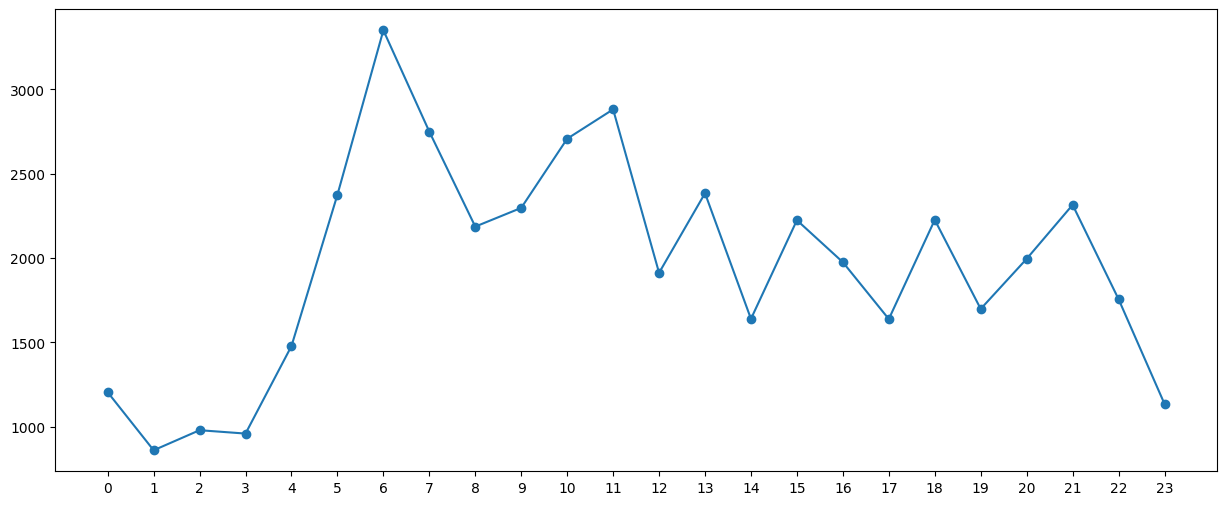

In [ ]:
specific_day = '2019-05-01'
day_data = df.loc[specific_day]

plt.figure(figsize=(15, 6))
plt.plot(day_data.index, day_data.values, marker='o')

In [ ]:
df.reset_index(inplace=True)

long_data = df.melt(id_vars=['Date'], var_name='Hour', value_name='Passengers')

long_data['Hour'] = pd.to_numeric(long_data['Hour'])

long_data = long_data.sort_values(by=['Date', 'Hour'])

long_data.reset_index(drop=True, inplace=True)

print(long_data)

          Date  Hour  Passengers
0   2019-05-01     0      1205.0
1   2019-05-01     1       861.0
2   2019-05-01     2       980.0
3   2019-05-01     3       960.0
4   2019-05-01     4      1479.0
..         ...   ...         ...
739 2019-05-31    19      1552.0
740 2019-05-31    20      3386.0
741 2019-05-31    21      2224.0
742 2019-05-31    22      1757.0
743 2019-05-31    23       859.0

[744 rows x 3 columns]


In [ ]:
long_data

,Date,Hour,Passengers
0,2019-05-01,0,1205.0
1,2019-05-01,1,861.0
2,2019-05-01,2,980.0
3,2019-05-01,3,960.0
4,2019-05-01,4,1479.0
...,...,...,...
739,2019-05-31,19,1552.0
740,2019-05-31,20,3386.0
741,2019-05-31,21,2224.0
742,2019-05-31,22,1757.0


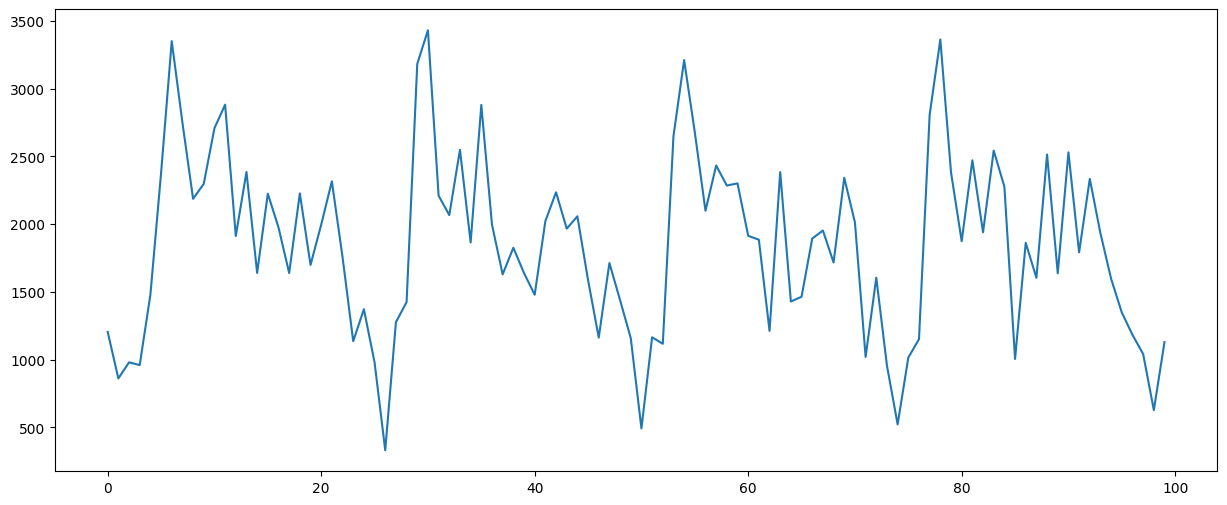

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(long_data['Passengers'][:100])

In [ ]:
forecast_range = pd.date_range(start=datetime(2019, 3, 1), end=datetime(2019, 6, 30), freq='MS')

model = SARIMAX(long_data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,24))
model_fit = model.fit()

predictions = model_fit.forecast(steps=24)

predictions_df = pd.DataFrame({'Passengers': predictions})

print(predictions_df)

      Passengers
744  1135.821332
745   884.372151
746   543.846001
747   926.694404
748  1184.892111
749  2890.491728
750  3383.654411
751  2309.102930
752  1951.021888
753  2516.111407
754  2439.591038
755  2543.332425
756  1971.898414
757  1614.148294
758  1459.585588
759  1937.339804
760  1739.601606
761  1618.393518
762  2167.265392
763  1910.830541
764  1960.291059
765  2002.939741
766  1595.938902
767  1339.593220


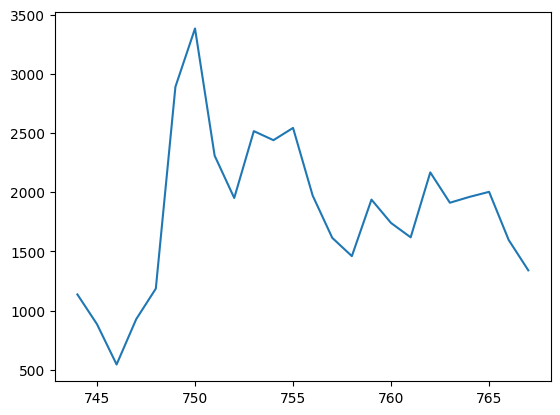

In [ ]:
plt.plot(predictions_df)

In [ ]:
adf_test = adfuller(long_data['Passengers'].dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -11.43306458845476
p-value: 6.445904312149529e-21


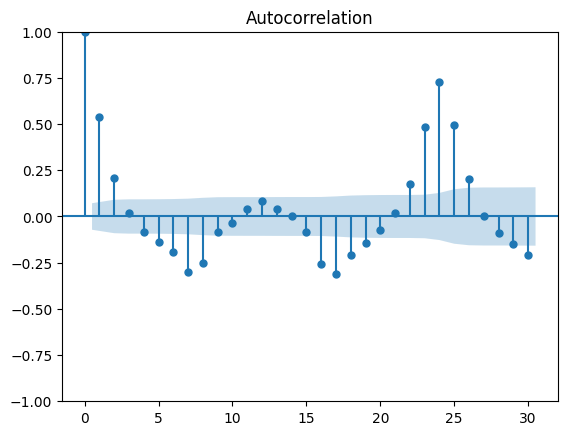

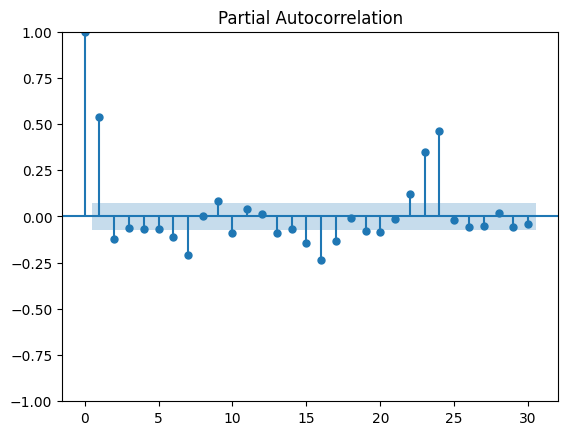

In [ ]:
acf_original = plot_acf(long_data['Passengers'].dropna(), lags=30)

pacf_original = plot_pacf(long_data['Passengers'].dropna(), lags=30)

In [ ]:
order = (2,0,2)
seasonal_order = (3,1,1,24)

In [ ]:
df_train = long_data.iloc[:int(len(long_data)*0.85)]
df_test = long_data.iloc[int(len(long_data)*0.85):]

In [ ]:
df_test

,Date,Hour,Passengers
632,2019-05-27,8,1921.0
633,2019-05-27,9,2605.0
634,2019-05-27,10,2785.0
635,2019-05-27,11,2494.0
636,2019-05-27,12,2117.0
...,...,...,...
739,2019-05-31,19,1552.0
740,2019-05-31,20,3386.0
741,2019-05-31,21,2224.0
742,2019-05-31,22,1757.0


In [ ]:
start_date = '2019-05-27 08:00:00'
end_date = '2019-05-31 23:00:00'

testing_range = pd.date_range(start=start_date, end=end_date, freq='H')

model = SARIMAX(df_train['Passengers'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(len(df_test))

testing_df = pd.DataFrame({'Date': testing_range.date, 'Hour': testing_range.hour, 'Passengers': testing})

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
testing_df

,Date,Hour,Passengers
632,2019-05-27,8,1865.172005
633,2019-05-27,9,2437.733342
634,2019-05-27,10,2392.230351
635,2019-05-27,11,2480.974071
636,2019-05-27,12,1947.746595
...,...,...,...
739,2019-05-31,19,1908.337600
740,2019-05-31,20,1937.711496
741,2019-05-31,21,2066.579712
742,2019-05-31,22,1735.318959


In [ ]:
rmse = np.sqrt(np.mean((df_test['Passengers'] - testing_df['Passengers']) ** 2))

mae = np.mean(np.abs(df_test['Passengers'] - testing_df['Passengers']))

rmse, mae

(393.55074946863004, 290.1303723827307)

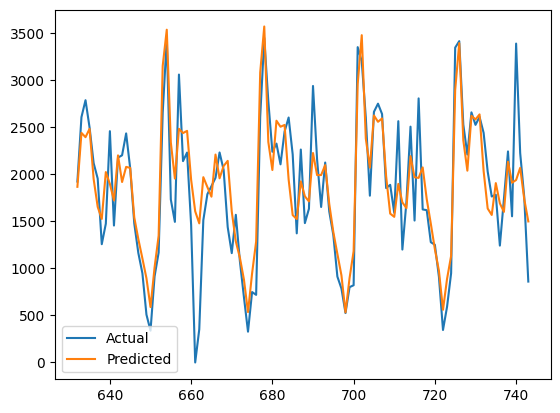

In [ ]:
plt.plot(df_test['Passengers'], label='Actual')
plt.plot(testing_df['Passengers'], label='Predicted')
#plt.plot(long_data['Passengers'][600:], label='Predicted')
plt.legend()

In [ ]:
start_date = '2019-06-01 00:00:00'
end_date = '2019-06-30 23:00:00'
forecast_range = pd.date_range(start=start_date, end=end_date, freq='H')

model = SARIMAX(long_data['Passengers'], order=(2,0,2), seasonal_order=(2,1,1,24))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Date': forecast_range.date, 'Hour': forecast_range.hour, 'Passengers': predictions})

print(predictions_df)

NameError: name 'pd' is not defined

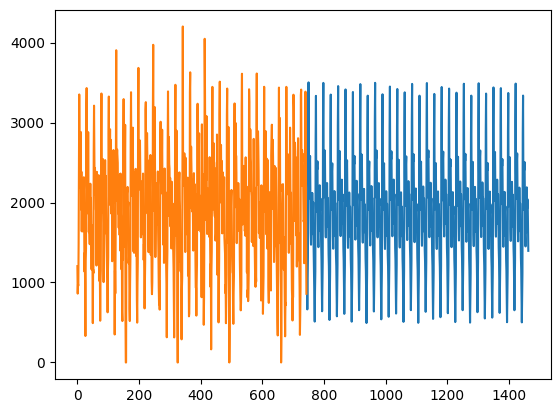

In [ ]:
plt.plot(predictions_df['Passengers'], label='Predicted')
plt.plot(long_data['Passengers'], label='Predicted')

In [ ]:
predictions_df

,Date,Hour,Passengers
744,2019-06-01,0,1342.838763
745,2019-06-01,1,1035.156898
746,2019-06-01,2,663.880414
747,2019-06-01,3,1046.206249
748,2019-06-01,4,1316.902944
...,...,...,...
1459,2019-06-30,19,1924.716092
1460,2019-06-30,20,2031.623982
1461,2019-06-30,21,2039.332598
1462,2019-06-30,22,1651.543818


In [ ]:
long_data

,Date,Hour,Passengers
0,2019-05-01,0,1205.0
1,2019-05-01,1,861.0
2,2019-05-01,2,980.0
3,2019-05-01,3,960.0
4,2019-05-01,4,1479.0
...,...,...,...
739,2019-05-31,19,1552.0
740,2019-05-31,20,3386.0
741,2019-05-31,21,2224.0
742,2019-05-31,22,1757.0


In [ ]:
dates_to_select = ['2019-05-05', '2019-05-12', '2019-05-19', '2019-05-26']

dates_to_select = pd.to_datetime(dates_to_select, errors='coerce')

filtered_data = long_data[long_data['Date'].isin(dates_to_select)]

In [ ]:
filtered_data

,Date,Hour,Passengers
96,2019-05-05,0,1183.0
97,2019-05-05,1,1041.0
98,2019-05-05,2,627.0
99,2019-05-05,3,1130.0
100,2019-05-05,4,1319.0
...,...,...,...
619,2019-05-26,19,2033.0
620,2019-05-26,20,944.0
621,2019-05-26,21,745.0
622,2019-05-26,22,1797.0


In [ ]:
filtered_data.reset_index(inplace=True)

In [ ]:
filtered_data.drop('index', axis=1, inplace=True)

<ipython-input-41-440222b4104f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('index', axis=1, inplace=True)


In [ ]:
filtered_data

,Date,Hour,Passengers
0,2019-05-05,0,1183.0
1,2019-05-05,1,1041.0
2,2019-05-05,2,627.0
3,2019-05-05,3,1130.0
4,2019-05-05,4,1319.0
...,...,...,...
91,2019-05-26,19,2033.0
92,2019-05-26,20,944.0
93,2019-05-26,21,745.0
94,2019-05-26,22,1797.0


In [ ]:
df_train_sunday = filtered_data.iloc[:72]
df_test_sunday = filtered_data.iloc[72:]

In [ ]:
order = (1,0,1)
seasonal_order = (0,1,1,24)

In [ ]:
start_date = '2019-05-26 00:00:00'
end_date = '2019-05-26 23:00:00'

testing_range = pd.date_range(start=start_date, end=end_date, freq='H')

model = SARIMAX(df_train_sunday['Passengers'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(len(df_test_sunday))

testing_df_sunday = pd.DataFrame({'Date': testing_range.date, 'Hour': testing_range.hour, 'Passengers': testing})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
rmse = np.sqrt(np.mean((df_test_sunday['Passengers'] - testing_df_sunday['Passengers']) ** 2))

mae = np.mean(np.abs(df_test_sunday['Passengers'] - testing_df_sunday['Passengers']))

rmse, mae

(558.5050914112103, 424.23882120027616)

In [ ]:
testing_df

,Date,Hour,Passengers
632,2019-05-27,8,1865.172005
633,2019-05-27,9,2437.733342
634,2019-05-27,10,2392.230351
635,2019-05-27,11,2480.974071
636,2019-05-27,12,1947.746595
...,...,...,...
739,2019-05-31,19,1908.337600
740,2019-05-31,20,1937.711496
741,2019-05-31,21,2066.579712
742,2019-05-31,22,1735.318959


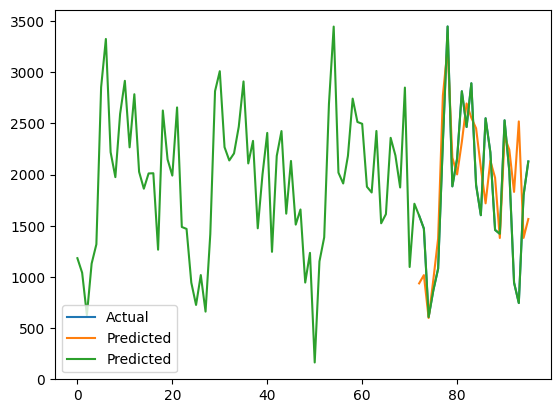

In [ ]:
plt.plot(df_test_sunday['Passengers'], label='Actual')
plt.plot(testing_df_sunday['Passengers'], label='Predicted')
plt.plot(filtered_data['Passengers'], label='Predicted')
plt.legend()

In [ ]:
start_date = '2019-06-02 00:00:00'
end_date = '2019-06-02 23:00:00'
forecast_range = pd.date_range(start=start_date, end=end_date, freq='H')

model = SARIMAX(filtered_data['Passengers'], order=(1,0,1), seasonal_order=(0,1,1,24))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df_sunday = pd.DataFrame({'Date': forecast_range.date, 'Hour': forecast_range.hour, 'Passengers': predictions})

print(predictions_df_sunday)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


           Date  Hour   Passengers
96   2019-06-02     0  1455.111785
97   2019-06-02     1  1381.625572
98   2019-06-02     2   724.740276
99   2019-06-02     3  1069.567055
100  2019-06-02     4  1360.571274
101  2019-06-02     5  2654.755644
102  2019-06-02     6  3389.046011
103  2019-06-02     7  2092.013621
104  2019-06-02     8  2101.750686
105  2019-06-02     9  2528.260789
106  2019-06-02    10  2625.966533
107  2019-06-02    11  2714.479499
108  2019-06-02    12  2243.496967
109  2019-06-02    13  1891.572774
110  2019-06-02    14  2064.861030
111  2019-06-02    15  2206.653318
112  2019-06-02    16  1745.148073
113  2019-06-02    17  1426.744599
114  2019-06-02    18  2428.906378
115  2019-06-02    19  2160.366454
116  2019-06-02    20  1476.396966
117  2019-06-02    21  1843.050499
118  2019-06-02    22  1511.598642
119  2019-06-02    23  1824.669390


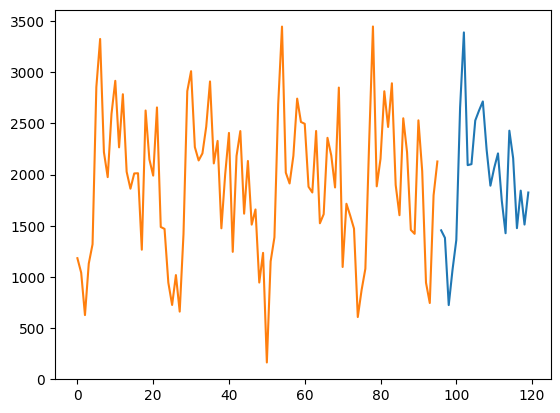

In [ ]:
plt.plot(predictions_df_sunday['Passengers'], label='Predicted')
plt.plot(filtered_data['Passengers'], label='Predicted')

In [ ]:
predictions_df_sunday['Passengers']

96     1455.111785
97     1381.625572
98      724.740276
99     1069.567055
100    1360.571274
101    2654.755644
102    3389.046011
103    2092.013621
104    2101.750686
105    2528.260789
106    2625.966533
107    2714.479499
108    2243.496967
109    1891.572774
110    2064.861030
111    2206.653318
112    1745.148073
113    1426.744599
114    2428.906378
115    2160.366454
116    1476.396966
117    1843.050499
118    1511.598642
119    1824.669390
Name: Passengers, dtype: float64